In [1]:
#Purpose of this is simply to see if 2d sampling is working, with plots etc

In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import math
import inspect
import numpy as np

/Users/hamishhaggerty/opt/anaconda3/envs/old_fastai/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import ipytest
ipytest.autoconfig()
import pytest


KeyboardInterrupt



In [3]:
import Base_Stein
from Base_Stein.SVGD_functions import *
from Base_Stein.SVGD_classes import *

In [6]:
def train(N=100,zdim=1,eta=0.01,steps=1000):
    
    svgd = trainable_SVGD(N=N,zdim=zdim,eta=eta)    
    svgd.Particles = 10*torch.rand(svgd.N,svgd.zdim)-5 #make input 10 dimensional instead



    for l in range(steps):
        g = svgd.get_gradient() # "Like forward"         
        svgd.AdamStep(gradient=g) #"Like step"
        
    return svgd.Particles
        
N=100
zdim=2
Particles = train(N=N,zdim=zdim,eta=0.01,steps=100)
#print(Particles)

In [6]:
N=100
zdim=2

svgd = trainable_SVGD(N=N,zdim=zdim,eta=0.03)

new_dim=10
svgd.Particles = 10*torch.rand(svgd.N,new_dim)-5 #make input 10 dimensional instead


In [8]:
class Enc(torch.nn.Module):
    
    def __init__(self,new_dim,zdim):
        super().__init__()
        self.fc1 = nn.Linear(new_dim,new_dim)
        self.fc2 = nn.Linear(new_dim,new_dim)
        self.fc3 = nn.Linear(new_dim,zdim)
        
        #self.fc1.weight = torch.nn.Parameter(torch.tensor([[2.,2.],[2.,2.]]))
        #self.fc2.weight = torch.nn.Parameter(torch.tensor([[2.,2.],[2.,2.]]))

    def forward(self,x):
        
        x=nn.Tanh()(self.fc1(x))
        x=nn.Tanh()(self.fc2(x))
        x=self.fc3(x)

        return x

N=200
zdim=2
new_dim=28*28
#new_dim=2

E = Enc(new_dim=new_dim,zdim=zdim)

optimizer = torch.optim.Adam(E.parameters(),lr=0.01)

criterion = nn.MSELoss()

#Outer loop
for epoch in range(100):

    svgd = trainable_SVGD(N=N,zdim=zdim,eta=0.03)
    
    svgd.Particles = 10*torch.rand(svgd.N,new_dim)-5 #make input 10 dimensional instead
    
    input('')
    Ep = E(svgd.Particles)
    Ep_detached = Ep.detach()
    
    svgd.Particles = Ep_detached

    #Inner loop
    for l in range(10):
    
        g = svgd.get_gradient() # "Like forward"
        svgd.AdamStep(gradient=g) #"Like step"
        
    loss = criterion(Ep,svgd.Particles)

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()
    
print('done')    


KeyboardInterrupt: Interrupted by user

torch.Size([100, 2])

In [59]:
for l in range(40):
    g = svgd.get_gradient() # "Like forward"
    svgd.AdamStep(gradient=g) #"Like step"


In [9]:
Particles = svgd.Particles

In [61]:
# svgd = trainable_SVGD(N=N,zdim=zdim,eta=0.03)   
# svgd.Particles = 10*torch.rand(svgd.N,new_dim)-5 #make input 10 dimensional instead

# Ep = E(svgd.Particles)
# Ep_detached = Ep.detach()

# svgd.Particles = Ep_detached

# Particles = svgd.Particles

In [10]:
import seaborn as sns
import numpy as np
data=Particles.detach().numpy()
#data=np.reshape(data,N)
#data=np.sort(data)


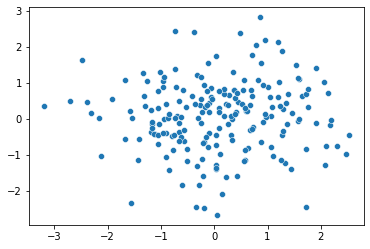

In [11]:
X = np.random.multivariate_normal(mean=[0, 0],cov = [[1, 0], [0, 1]],size=N)

ax=sns.scatterplot(data=X, x=X[:,0], y=X[:,1])
#sns.kdeplot(data=X, x=X[:,0], y=X[:,1],label='kde of MVN')


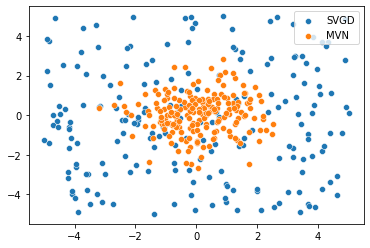

In [12]:


ax=sns.scatterplot(data=data, x=data[:,0], y=data[:,1],label='SVGD')
ax=sns.scatterplot(data=X, x=X[:,0], y=X[:,1],label='MVN')
#sns.kdeplot(data=data, x=data[:,0], y=data[:,1],label='kde of data')



In [65]:
data.shape

(200, 2)

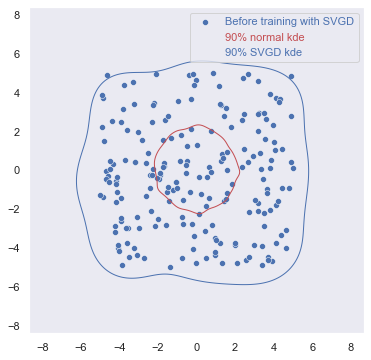

In [14]:
#Reasonably important TODO: Want to plot true 90% ellipse instead of just estimating it from data

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 3000
mean = [0, 0]
cov = [(1., 0.), (.0, 1.)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
#sns.scatterplot(x=x, y=y, s=5, color=".15")
#sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")

sns.scatterplot(data=data, x=data[:,0], y=data[:,1],color='b',label='Before training with SVGD')

sns.kdeplot(x=x, y=y, levels=[0.1], color="r", linewidths=1,label='90% normal kde')
sns.kdeplot(x=data[:,0], y=data[:,1], levels=[0.1], color="b", linewidths=1,label='90% SVGD kde')


#sns.scatterplot(data=data, x=data[:,0], y=data[:,1],color='b',label='samples from SVGD')

plt.legend(labelcolor=['b','r'],loc=1)



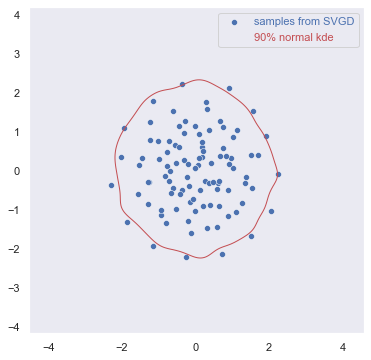
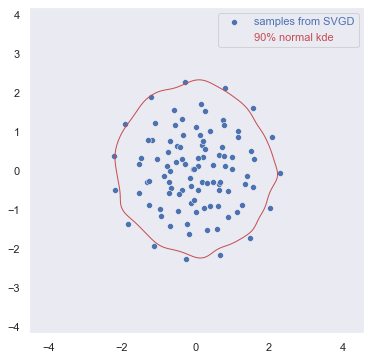